In [ ]:
# Code from last time (changed order of parameters)

In [90]:
import numpy
def julia(c, max_iter, xmin=-2.0, xmax=2.0, ymin=-2.0,ymax=2.0, width=500, height=500):
    """Draw Julia set J(f) for f(z)=z^2+c, c a fixed complex number with |c|<2,
    in window where x ranges in (xmin,xmax), y ranges in (ymin,ymax), 
    grid of size width x height (in pixels)
    Test max_iter number iterates of f."""

    xinc = (xmax-xmin)/width
    yinc = (ymax-ymin)/height

    escape = numpy.zeros((height,width))
    # array will eventually represent escaping

    for x in range(width):
        for y in range(height): 
            z = complex(xmin + x*xinc, ymin + y*yinc)
            # Want: set escape[y,x]=1 if z escapes i.e. |z|, |f(z)|, |f^{\circ 2}(z)| ->infty
            # Special thing about f(z) = z^2+c, when |c|<2:
            # if |z|>2, |f^{\circ n}(z)|-> infty as n ->infty
            # So: if for any z, |f^{\circ k}(z)|>2, z escapes 
            
            # compute iterates of f applied to z 
            n=0 # which iterate we're currently on
            while n < max_iter: 
                z = z^2 + c # take next iterate i.e. replace z by f(z)
                n+=1
                if abs(z)>2:
                    # then by above comments, know that original z escapes 
                    escape[y,x]=1
                    break # breaks out of containing loop 
    
    return matrix_plot(escape, origin='lower')

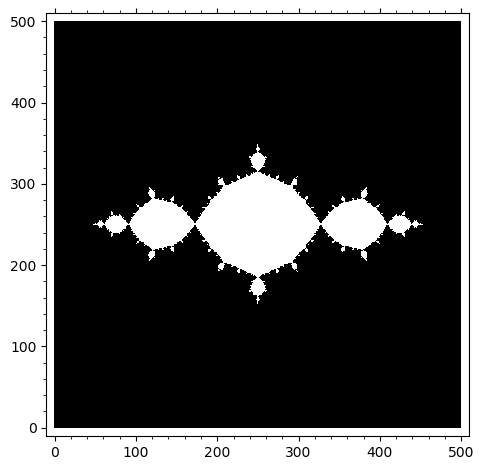

In [4]:
julia(complex(-1,0), 20)
#"basillica" julia set f(z)=z^2-1

In [ ]:
# ZOOMING

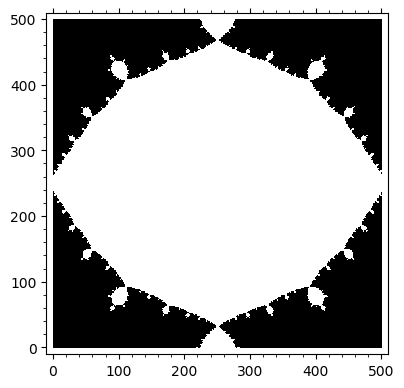

In [91]:
# zoom in centered at origin
# f(z) = z^2 -1 
julia(complex(-1,0), 20, -0.6,0.6, -0.6,0.6)


In [5]:
# want to convert grid coords to z coord
def grid_to_cpx(x,y, xmin=-2, xmax=2, ymin=-2, ymax=2, height=500, width=500):
    xinc = (xmax-xmin)/width
    yinc = (ymax-ymin)/height
    return complex(xmin + x*xinc, ymin + y*yinc)

In [8]:
grid_to_cpx(335,250)

(0.68+0j)

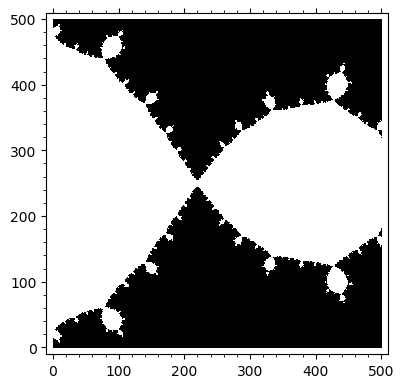

In [14]:
# zoom in on a particular point of julia set
c = complex(-1,0)
(cx,cy)=(335,250)
z = grid_to_cpx(cx,cy)
zr = real(z)
zi = imag(z)
e = 0.5
julia(c, 20, zr-e,zr+e, zi-e, zi+e)

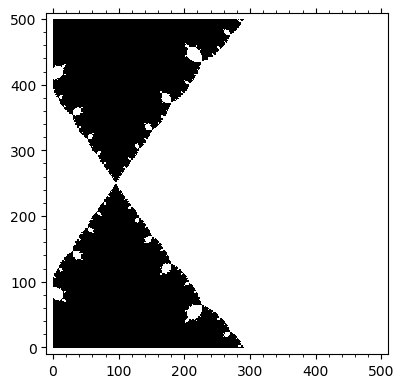

In [16]:
# to get good pictures, need to increase max_iter as we zoom in 
# zoom in on a particular point of julia set
c = complex(-1,0)
(cx,cy)=(335,250)
z = grid_to_cpx(cx,cy)
zr = real(z)
zi = imag(z)
e = 0.1 # side length of window will be 2e
julia(c, 40, zr-e,zr+e, zi-e, zi+e)

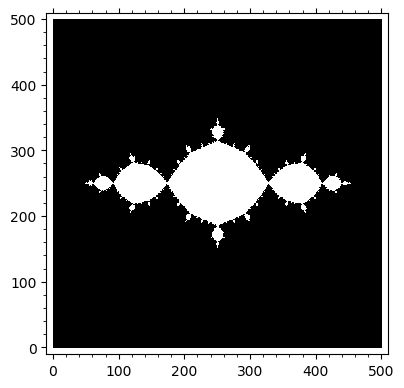

In [19]:
julia(complex(-1,0), 20)
#"basillica" julia set f(z)=z^2-1

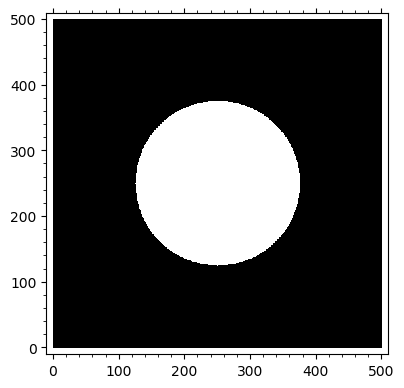

In [20]:
julia(complex(0,0), 20)
#"basillica" julia set f(z)=z^2

In [ ]:
# ORBITS

In [50]:
# Want: draw z, f(z), f(f(z)),... for various z (called orbit of z)
# for f(z) = z^2 +c
def draw_orbit(z,c,num_iter, col="blue"):
    """Return list_plot with z,f(z),f(f(z)),... up to num_iter iterations,
    for f(z) = z^2 + c."""
    orbit = [z] # list that will store orbit
    for n in range(num_iter):
        new = orbit[-1]^2 + c # apply f
        orbit.append(new)
    return list_plot(orbit, size=20, color=col)


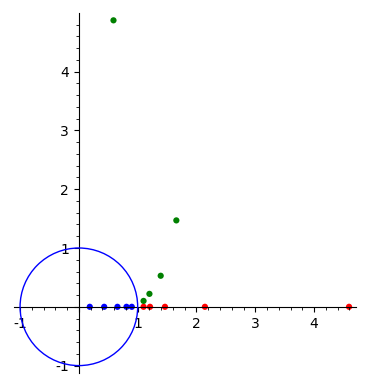

In [47]:
draw_orbit(complex(1.1,0),complex(0,0),4,'red')+\
draw_orbit(complex(0.9,0),complex(0,0),4,'blue')+\
draw_orbit(complex(1.1,0.1),complex(0,0),4,'green')+\
plot(circle((0,0),1))

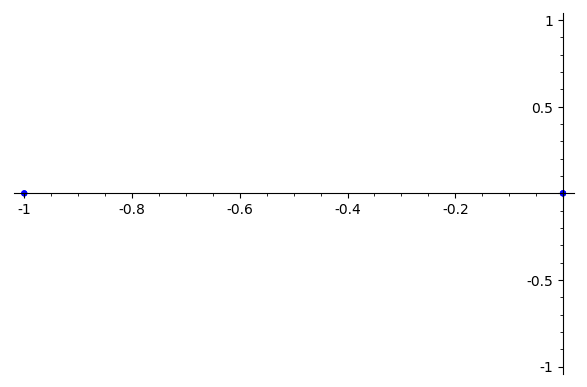

In [51]:
# Look at f(z)=z^2-1
draw_orbit(complex(0,0),complex(-1,0), 4)
# 0-> -1 -> 0 -> -1 -> 0

In [57]:
# Want: draw z, f(z), f(f(z)),... for various z (called orbit of z)
# for f(z) = z^2 +c
def draw_orbit_connected(z,c,num_iter, col="blue"):
    """Return list_plot with z,f(z),f(f(z)),... up to num_iter iterations,
    for f(z) = z^2 + c. Connects each point to next iterate with segment."""
    orbit = [z] # list that will store orbit
    for n in range(num_iter):
        new = orbit[-1]^2 + c # apply f
        orbit.append(new)
    return list_plot(orbit, size=20, color=col)\
    +line([(real(z),imag(z)) for z in orbit])

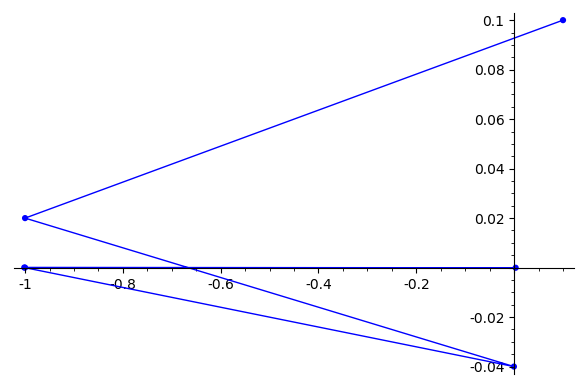

In [92]:
# Look at f(z)=z^2-1
draw_orbit_connected(complex(0.1,0.1),complex(-1,0), 5)

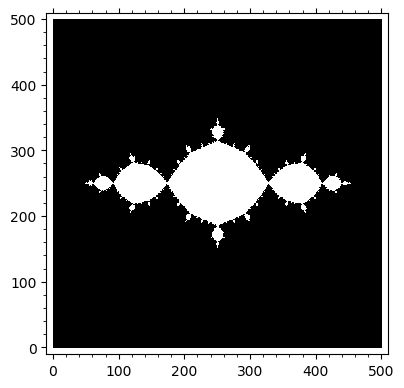

In [59]:
julia(complex(-1,0), 20)
#"basillica" julia set f(z)=z^2-1

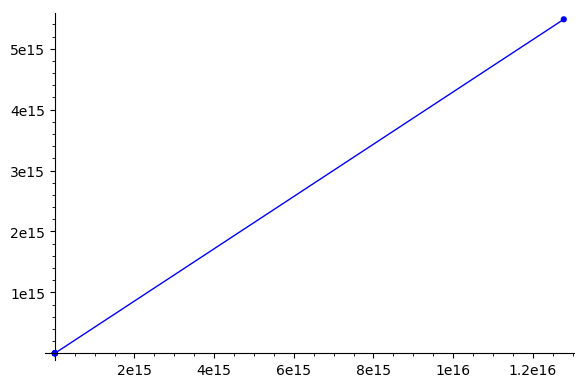

In [73]:
z=grid_to_cpx(258,380)
draw_orbit_connected(z,complex(-1,0), 7)
# Note numbers are very large: 1.2e16 = 1.2 x 10^16

In [74]:
# COLORED JULIA SETS

In [ ]:
# Goal: color plane according to how fast points escape under iteration of f

In [81]:
import numpy
def julia_color(c, max_iter, xmin=-2.0, xmax=2.0, ymin=-2.0,ymax=2.0, width=500, height=500):
    """Draw Julia set J(f) for f(z)=z^2+c, c a fixed complex number with |c|<2,
    in window where x ranges in (xmin,xmax), y ranges in (ymin,ymax), 
    grid of size width x height (in pixels)
    Test max_iter number iterates of f.
    Color based on how long it takes to escape"""

    xinc = (xmax-xmin)/width
    yinc = (ymax-ymin)/height

    escape = numpy.zeros((height,width))
    # array will eventually represent escaping

    for x in range(width):
        for y in range(height): 
            z = complex(xmin + x*xinc, ymin + y*yinc)
            # Want: set escape[y,x]=1 if z escapes i.e. |z|, |f(z)|, |f^{\circ 2}(z)| ->infty
            # Special thing about f(z) = z^2+c, when |c|<2:
            # if |z|>2, |f^{\circ n}(z)|-> infty as n ->infty
            # So: if for any z, |f^{\circ k}(z)|>2, z escapes 
            
            # compute iterates of f applied to z 
            n=0 # which iterate we're currently on
            while n < max_iter: 
                z = z^2 + c # take next iterate i.e. replace z by f(z)
                n+=1
                if abs(z)>2:
                    # then by above comments, know that original z escapes 
                    break # breaks out of containing loop 
            # at this point n is between 0 and max_iter,
            # bigger the longer it took escape
            escape[y,x]=n/max_iter
            # if didn't escape, n=max_iter
    
    return matrix_plot(escape, origin='lower', cmap='hot')

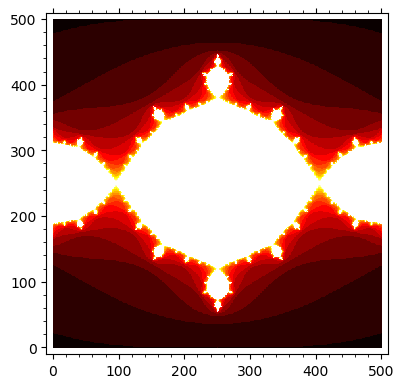

In [79]:
julia_color(complex(-1,0), 20,-1,1,-1,1)

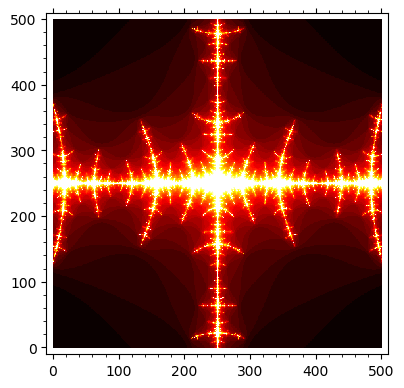

In [80]:
# Feigenbaum julia set
julia_color(complex(-1.401,0), 45,-0.5,0.5, -0.5,0.5)

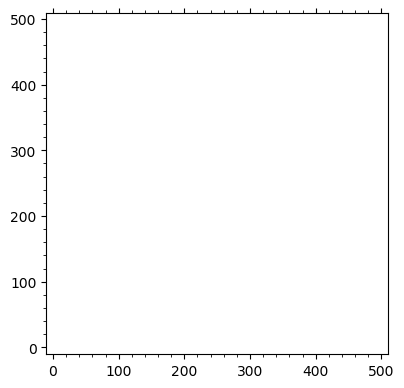

In [89]:
# f(z) = z^2 +(0.5+0.7i)
julia(complex(0.5,0.7), 30, -3, 3, -3, 3)
# Actually should be all black: julia[y,x] = 1 for all (x,y) tested
# but sage doesn't like all black, so makes all white. 
# Q: Is escaping set actually everything? 

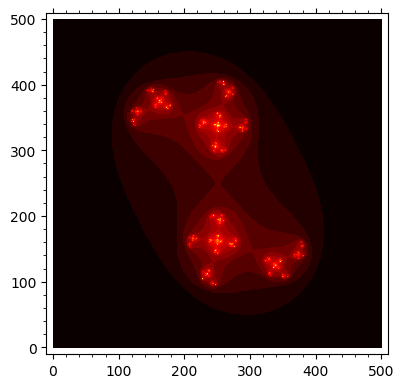

In [85]:
# f(z) = z^2 +(0.5+0.7i)
julia_color(complex(0.5,0.7), 30, -2, 2, -2, 2)
# The Julia set consists of the scattered "stars" at the centers of the hot regions 
# This set is "small," but non-empty, and in fact has infinitely many points